# Evaluating  obtained convolutional Transfer learning neuronal networks based models

Christian SOLIS CALERO

###Inicializando y Cargando la data

In [ ]:
# Cargar el Drive helper y mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive/Capacitaciones/Diplomado-Machine_learning-SARS-Cov2/Proyecto_deep_learning/Covid_Data_GradientCrescent/PA_DL_models


In [ ]:
%cd /content/drive/MyDrive/Capacitaciones/Diplomado-Machine_learning-SARS-Cov2/Proyecto_deep_learning/Covid_Data_GradientCrescent

/content/drive/MyDrive/Capacitaciones/Diplomado-Machine_learning-SARS-Cov2/Proyecto_deep_learning/Covid_Data_GradientCrescent


In [ ]:
!ls *_Epochs.h5 > modelos_Epochs.txt

Upload the models

In [ ]:
!cat modelos_Epochs.txt

Covid_PA_DenseNet121_Epochs.h5
Covid_PA_InceptionV3_Epochs.h5
Covid_PA_resnet50_Epochs.h5
Covid_PA_vgg16_Epochs.h5
Covid_PA_Xception_Epochs.h5


In [ ]:
models_files = []
with open('modelos_Epochs.txt') as inputfile:
    for line in inputfile:
        models_files.append(line.strip())

In [ ]:
from keras.models import load_model
models= []
[models.append(load_model(i)) for i in models_files]

[None, None, None, None, None]

In [ ]:
#Obtainig a list with the names of models
import re
name_models=[]
for k in models_files:
  name_models.append(re.sub(r'Covid_PA_', '',re.sub(r'_Epochs.h5', '', k)))

In [ ]:
name_models

['DenseNet121', 'InceptionV3', 'resnet50', 'vgg16', 'Xception']

In [ ]:
models[1].summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 3, 3, 2048)        21802784  
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               4718848   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 26,521,889
Trainable params: 4,719,105
Non-trainable params: 21,802,784
_________________________________________________________________


Updating the libraries

In [ ]:
import tensorflow as tf
from numpy.random import seed
seed(8) #1
tf.random.set_seed(7) 

import numpy as np 
import pandas as pd

In [ ]:
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model ,load_model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import tensorflow as tf

Upadating the datasets

In [ ]:
from os import listdir
data_list = listdir('../twoF/train')

In [ ]:
DATASET_PATH  = '../twoF/train'
test_dir =  '../twoF/test'
IMAGE_SIZE    = (150, 150)
NUM_CLASSES   = len(data_list)
BATCH_SIZE    = 10  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS    = 100
LEARNING_RATE =0.0005 #start off with high rate first 0.001 #5e-4

#Train datagen here is a preprocessor
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=50,
                                   featurewise_center = True,
                                   featurewise_std_normalization = True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.25,
                                   zoom_range=0.1,
                                   zca_whitening = True,
                                   channel_shift_range = 20,
                                   horizontal_flip = True ,
                                   vertical_flip = True ,
                                   validation_split = 0.2,
                                   fill_mode='constant')

# test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
#                                    fill_mode='constant')

train_batches = train_datagen.flow_from_directory(DATASET_PATH,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = "training",
                                                  seed=42,
                                                  class_mode="binary",
                                                 
                                                  )

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = "validation",
                                                  seed=42,
                                                  class_mode="binary",
                                                  )

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:342: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


Found 608 images belonging to 2 classes.
Found 151 images belonging to 2 classes.


In [ ]:
NUM_CLASSES 

2

In [ ]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

eval_generator = test_datagen.flow_from_directory(
        test_dir,target_size=IMAGE_SIZE,
        batch_size=1,
        shuffle=False,
        seed=42,

        class_mode="binary")
eval_generator.reset()    

Found 330 images belonging to 2 classes.


## Trabajando con un modelo

In [ ]:
eval_generator.reset()  
#x = model.evaluate_generator(eval_generator,
x = models[0].evaluate(eval_generator,
                           steps = np.ceil(len(eval_generator) / BATCH_SIZE),
                           use_multiprocessing = False,
                           verbose = 1,
                           workers=1
                           )
print('Test loss:' , x[0])
print('Test accuracy:',x[1])

109/109 [==============================] - 12s 107ms/step - loss: 1.6479e-04 - acc: 1.0000
Test loss: 0.00016479386249557137
Test accuracy: 1.0


In [ ]:
eval_generator.reset()  
pred = models[0].predict_generator(eval_generator,1089,verbose=1)
print("Predictions finished")

   1/1089 [..............................] - ETA: 2:19

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


1089/1089 [==============================] - 120s 110ms/step
Predictions finished


In [ ]:
import re
labels=[]
resultados=[]
probabilidades=[]
prob_normal=[]
prob_covid=[]

In [ ]:
regex = re.compile('\/')

In [ ]:
#Obtaining only prediction of classes
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg
for index, probability in enumerate(pred):
    labels.append(regex.split(eval_generator.filenames[index])[0])

    prob_normal.append(probability[0])
    prob_covid.append((1-probability[0]))

    if probability > 0.5:
        resultados.append("normal")
        probabilidades.append(probability[0])
    else:
        resultados.append("covid")
        probabilidades.append(1-probability[0])

covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg


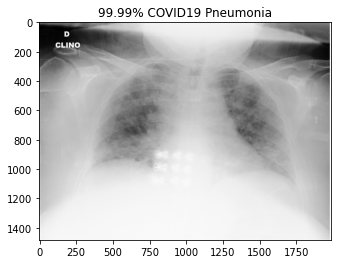

covid/03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg


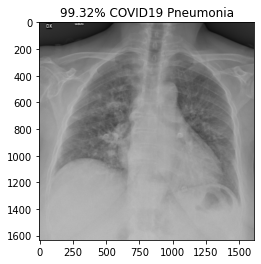

covid/1-s2.0-S0140673620303706-fx1_lrg.jpg


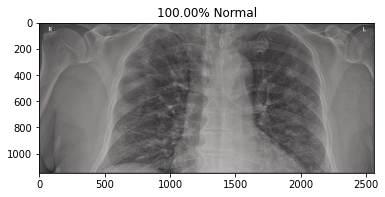

covid/1-s2.0-S0929664620300449-gr2_lrg-a.jpg


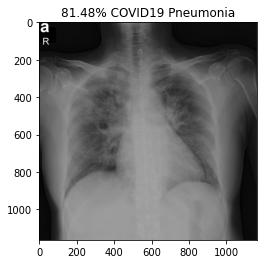

covid/1-s2.0-S0929664620300449-gr2_lrg-b.jpg


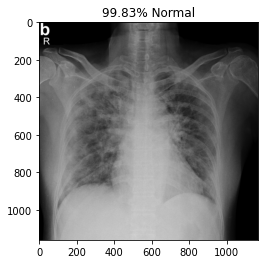

covid/1-s2.0-S0929664620300449-gr2_lrg-c.jpg


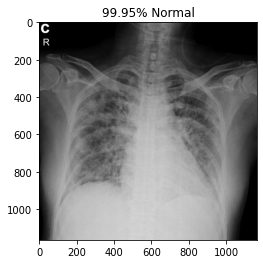

covid/1-s2.0-S0929664620300449-gr2_lrg-d.jpg


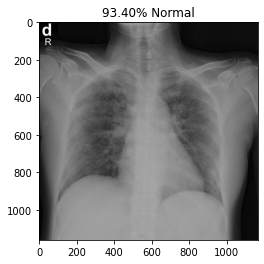

covid/1-s2.0-S1684118220300608-main.pdf-001.jpg


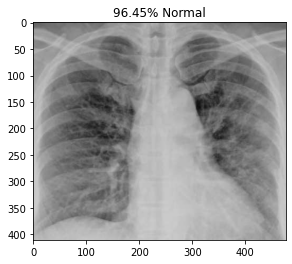

covid/1-s2.0-S1684118220300608-main.pdf-002.jpg


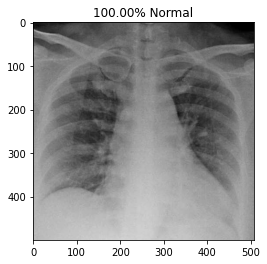

covid/1-s2.0-S1684118220300682-main.pdf-002-a1.png


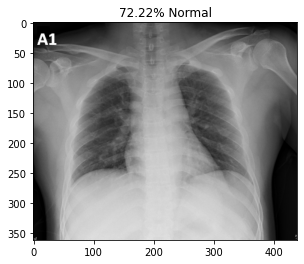

covid/1-s2.0-S1684118220300682-main.pdf-002-a2.png


KeyboardInterrupt: ignored

In [ ]:
#Obtaining images prediction
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg
for index, probability in enumerate(pred):
    labels.append(regex.split(eval_generator.filenames[index])[0])
    image_path = test_dir + "/" +eval_generator.filenames[index]
    image = mpimg.imread(image_path)
    #BGR TO RGB conversion using CV2
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    pixels = np.array(image)
    plt.imshow(pixels)
    
    print(eval_generator.filenames[index])
    prob_normal.append(probability[0])
    prob_covid.append((1-probability[0]))

    if probability > 0.5:
        resultados.append("normal")
        probabilidades.append(probability[0])
        plt.title("%.2f" % (probability[0]*100) + "% Normal")
    else:
        resultados.append("covid")
        probabilidades.append(1-probability[0])
        plt.title("%.2f" % ((1-probability[0])*100) + "% COVID19 Pneumonia")
    plt.show()

Confusion Matrix and classification_report

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
regex2 = re.compile('\_')

In [ ]:
print(regex2.split(models_files[0])[2])
print('Confusion Matrix')
print(confusion_matrix(labels, resultados))
print('')
print('Classification Report')
target_names = ['covid', 'normal']
print(classification_report(labels, resultados, target_names=target_names))

DenseNet121
Confusion Matrix
[[414   7]
 [ 55 613]]

Classification Report
              precision    recall  f1-score   support

       covid       0.88      0.98      0.93       421
      normal       0.99      0.92      0.95       668

    accuracy                           0.94      1089
   macro avg       0.94      0.95      0.94      1089
weighted avg       0.95      0.94      0.94      1089



__When to Use ROC vs. Precision-Recall Curves?__
Generally, the use of ROC curves and precision-recall curves are as follows:
- ROC curves should be used when there are roughly equal numbers of observations for each class.
- Precision-Recall curves should be used when there is a moderate to large class imbalance.
The reason for this recommendation is that ROC curves present an optimistic picture of the model on datasets with a class imbalance.

ROC curve and auc on an imbalanced dataset

In [ ]:
valores=[1 if labels[i]=="covid" else 0 for i in range(len(labels))]

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(valores))]
# calculate scores
ns_auc = roc_auc_score(valores, ns_probs)
covid_auc = roc_auc_score(valores, prob_covid)

No Skill: ROC AUC=0.500
DenseNet121: ROC AUC=0.988


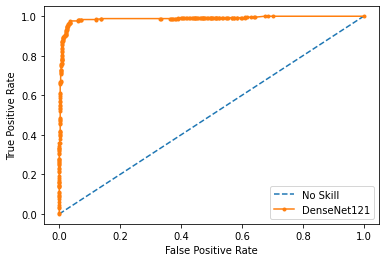

In [ ]:
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('DenseNet121: ROC AUC=%.3f' % (covid_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(valores, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(valores, prob_covid)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='DenseNet121')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

__Precision-recall curve and f1__

Logistic: f1=0.944 auc=0.985


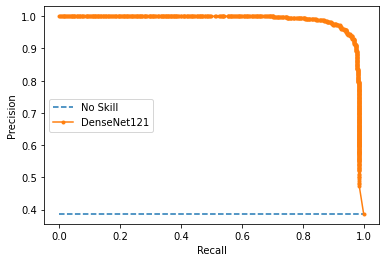

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
val_result=[1 if resultados[i]=="covid" else 0 for i in range(len(resultados))]
val_result=np.array(val_result)
valoresA=np.array(valores)

# predict class values
yhat = val_result
lr_precision, lr_recall, _ = precision_recall_curve(valoresA, prob_covid)
lr_f1, lr_auc = f1_score(valoresA, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(valoresA[valoresA==1]) / len(valoresA)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='DenseNet121')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

## Trabajando con varios modelos

In [ ]:
#x_list=[]
Test_loss =[]
Test_accuracy=[]
for i in range(len(models)):
  eval_generator.reset()  
  x_list = models[i].evaluate(eval_generator,
                           steps = np.ceil(len(eval_generator) / BATCH_SIZE),
                           use_multiprocessing = False,
                           verbose = 1,
                           workers=1
                           )
  Test_loss.append(x_list[0])
  Test_accuracy.append(x_list[1])

33/33 [==============================] - 8s 126ms/step - loss: 0.0144 - acc: 1.0000


In [ ]:
del list

In [ ]:
df_modelos = pd.DataFrame(list(zip(name_models, Test_loss,Test_accuracy)),
                          columns =['Model', 'Loss', 'Accuracy'])

In [ ]:
df_modelos

,Model,Loss,Accuracy
0,DenseNet121,0.385690,0.878788
1,InceptionV3,0.141162,0.939394
2,resnet50,0.130665,0.969697
3,vgg16,0.453235,0.787879
4,Xception,0.014440,1.000000


In [ ]:
predicciones=[]
for i in range(len(models)):
  eval_generator.reset()  
  pred = models[i].predict_generator(eval_generator,330,verbose=1)
  predicciones.append(pred)
print("Predictions finished")

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


330/330 [==============================] - 47s 132ms/step
Predictions finished


In [ ]:
#Generando una lista con las etiquetas de las imagenes
labels=[]
regex = re.compile('\/')
import cv2
for index, probability in enumerate(predicciones[0]):
    labels.append(regex.split(eval_generator.filenames[index])[0])

In [ ]:
df_predicciones = pd.DataFrame(labels,columns =['Label'])

In [ ]:
lista_modelos=[]
for j in predicciones:
  lista_modelos.append([i[0] for i in j.tolist()])

In [ ]:
import numpy as np
lista_modelosF=np.array(lista_modelos).T.tolist()
df_predicciones= pd.DataFrame(lista_modelosF,columns =name_models)
df_predicciones['Label'] = labels
df_predicciones

,DenseNet121,InceptionV3,resnet50,vgg16,Xception,Label
0,0.000013,0.000681,0.009078,0.000175,4.931355e-05,covid
1,0.000031,0.006963,0.043851,0.013588,1.542141e-05,covid
2,0.001929,0.002591,0.382733,0.019397,4.594828e-05,covid
3,0.003868,0.048922,0.016421,0.002246,6.739527e-03,covid
4,0.000025,0.021827,0.006068,0.003772,5.382893e-07,covid
...,...,...,...,...,...,...
325,0.999939,0.999484,0.948295,0.999912,9.999070e-01,normal
326,0.999855,0.999998,0.981115,0.999995,9.999791e-01,normal
327,0.999924,1.000000,0.963362,0.999997,9.999991e-01,normal
328,0.999986,1.000000,0.959987,0.999993,9.999997e-01,normal


In [ ]:
df_prediccionesF=df_predicciones.iloc[:, 0:5].apply(lambda x: 1-x, axis=1)
df_prediccionesF["label"]=df_predicciones.iloc[:, 5].apply(lambda x : 1 if (x =="covid") else 0)

In [ ]:
df_prediccionesF

,DenseNet121,InceptionV3,resnet50,vgg16,Xception,label
0,0.999987,0.999319,0.990922,0.999825,9.999507e-01,1
1,0.999969,0.993037,0.956149,0.986412,9.999846e-01,1
2,0.998071,0.997409,0.617267,0.980603,9.999541e-01,1
3,0.996132,0.951078,0.983579,0.997754,9.932605e-01,1
4,0.999975,0.978173,0.993932,0.996228,9.999995e-01,1
...,...,...,...,...,...,...
325,0.000061,0.000516,0.051705,0.000088,9.298325e-05,0
326,0.000145,0.000002,0.018885,0.000005,2.086163e-05,0
327,0.000076,0.000000,0.036638,0.000003,8.940697e-07,0
328,0.000014,0.000000,0.040013,0.000007,2.980232e-07,0


In [ ]:
# Guardar datos de las probabilidades
df_prediccionesF.to_csv('../Notebooks/Models_PA_results_probabilities.csv', index=False)

## Analisis de los resultados de los modelos

__Reporte de clasificación y Matrices de confusión__

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored

In [ ]:
regex2 = re.compile('\_')

In [ ]:
cf_matrix=[]
target_names = ['covid', 'normal']
for i in range(len(models)):
  resultados=list(df_predicciones.iloc[:, i].apply(lambda x: "normal" if (x > 0.5) else "covid"))
  cf_matrix.append(confusion_matrix(labels, resultados))
  print(colored(name_models[i], attrs=['bold']))
  print(classification_report(labels, resultados, target_names=target_names))

DenseNet121
              precision    recall  f1-score   support

       covid       1.00      0.88      0.94        86
      normal       0.96      1.00      0.98       244

    accuracy                           0.97       330
   macro avg       0.98      0.94      0.96       330
weighted avg       0.97      0.97      0.97       330

InceptionV3
              precision    recall  f1-score   support

       covid       0.99      0.98      0.98        86
      normal       0.99      1.00      0.99       244

    accuracy                           0.99       330
   macro avg       0.99      0.99      0.99       330
weighted avg       0.99      0.99      0.99       330

resnet50
              precision    recall  f1-score   support

       covid       0.90      0.95      0.93        86
      normal       0.98      0.96      0.97       244

    accuracy                           0.96       330
   macro avg       0.94      0.96      0.95       330
weighted avg       0.96      0.96      0.

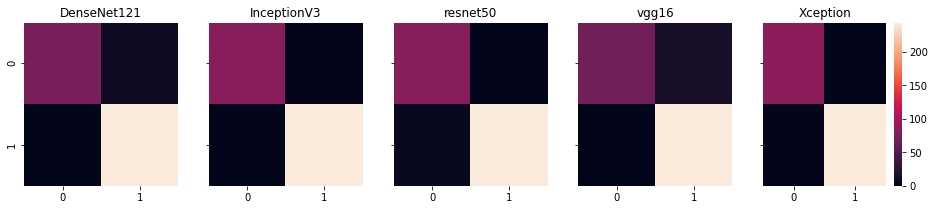

In [ ]:
fig, axn = plt.subplots(1,5, sharex=True, sharey=True,figsize=(16,3))
for i, ax in enumerate(axn.flat):
    sns.heatmap(cf_matrix[i], ax=ax,cbar=i==4)
    ax.set_title(name_models[i],fontsize=12)

__ROC curves and auc on an imbalanced dataset__

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
#Values of the labels in terms of 0 and 1
valores=list(df_prediccionesF["label"])
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(valores))]
covid_auc=[]

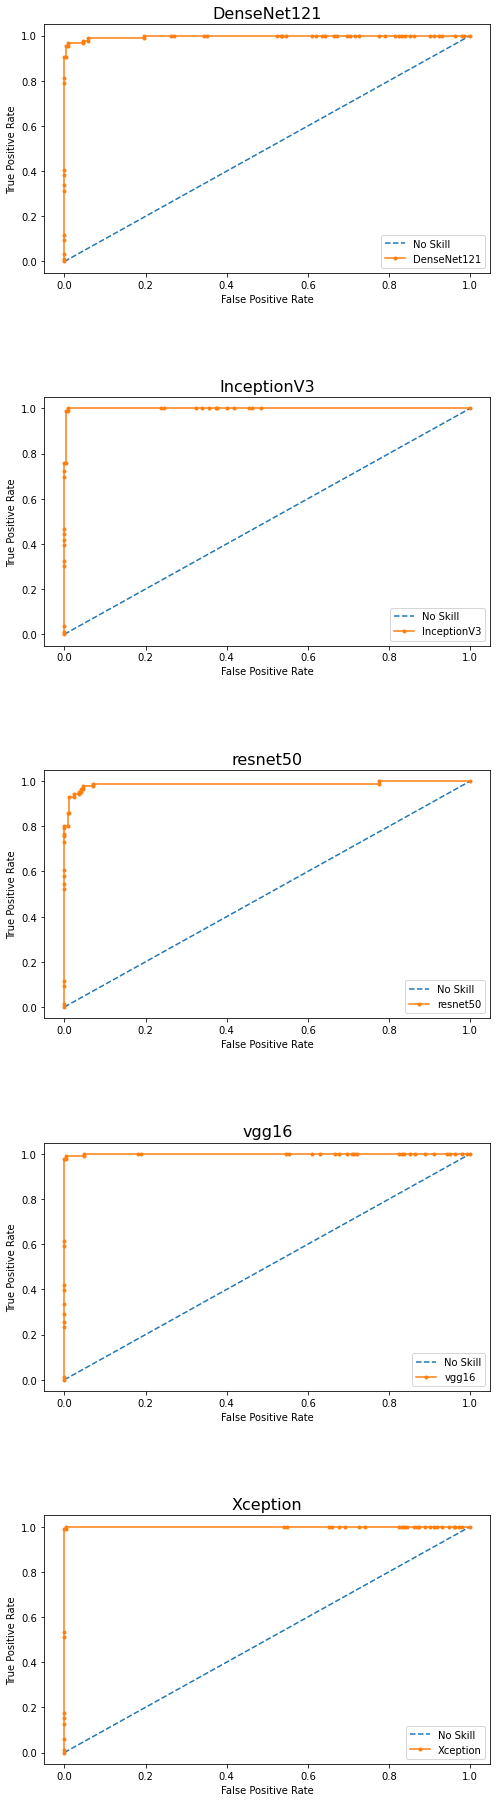

In [ ]:
fig,axes = plt.subplots(5, figsize=(8,32))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
for i,ax in enumerate(axes.flat):
  prob_covid=list(df_prediccionesF.iloc[:, i])
  # calculate scores
  ns_auc = roc_auc_score(valores, ns_probs)
  covid_auc.append(roc_auc_score(valores, prob_covid))
  # summarize scores
  #print('No Skill: ROC AUC=%.3f' % (ns_auc))
  #print(name_models[i]': ROC AUC=%.3f' % (covid_auc[i]))
  # calculate roc curves
  ns_fpr, ns_tpr, _ = roc_curve(valores, ns_probs)
  lr_fpr, lr_tpr, _ = roc_curve(valores, prob_covid)
  # plot the roc curve for the model
  ax.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
  ax.plot(lr_fpr, lr_tpr, marker='.', label=name_models[i])
  # axis labels
  ax.set_title(name_models[i],fontsize=16)
  ax.set_xlabel('False Positive Rate')
  ax.set_ylabel('True Positive Rate')
  # show the legend
  ax.legend()
  # show the plot

plt.show()

__Precision-recall curve and f1__

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

valores=list(df_prediccionesF["label"]) #True values for labels
valoresA=np.array(valores)
covid_f1_score=[]
covid_auc_score=[]

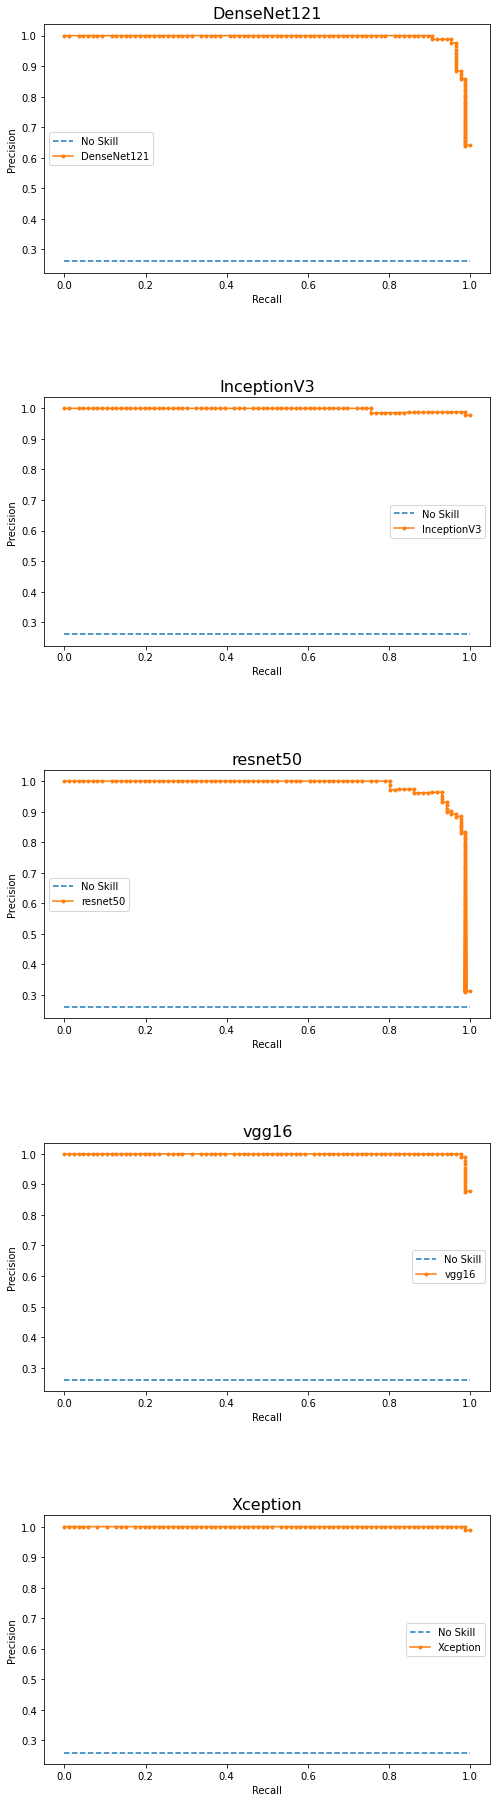

In [ ]:
fig,axes = plt.subplots(5, figsize=(8,32))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
for i,ax in enumerate(axes.flat):
  # Values of probabilities (results of models)
  prob_covid=list(df_prediccionesF.iloc[:, i])
  # predict class values (results of models)
  val_result=list(df_predicciones.iloc[:, i].apply(lambda x: 0 if (x > 0.5) else 1)) 
  val_result=np.array(val_result)
  yhat = val_result
  lr_precision, lr_recall, _ = precision_recall_curve(valoresA, prob_covid)
  lr_f1, lr_auc = f1_score(valoresA, yhat), auc(lr_recall, lr_precision)
  # summarize scores
  covid_f1_score.append(lr_f1)
  covid_auc_score.append(lr_auc)
  # plot the precision-recall curves
  no_skill = len(valoresA[valoresA==1]) / len(valoresA)
  ax.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
  ax.plot(lr_recall, lr_precision, marker='.', label=name_models[i])
  # axis labels
  ax.set_title(name_models[i],fontsize=16)
  ax.set_xlabel('Recall')
  ax.set_ylabel('Precision')
  # show the legend
  ax.legend()
# show the plot
plt.show()

__Resumiendo los resultados__

In [ ]:
df_modelosF = df_modelos

In [ ]:
df_modelosF['Roc_AUC'] = covid_auc
df_modelosF['F1'] = covid_f1_score
df_modelosF['PR_AUC'] = covid_auc_score
df_modelosF

,Model,Loss,Accuracy,Roc_AUC,F1,PR_AUC
0,DenseNet121,0.385690,0.878788,0.996235,0.938272,0.991963
1,InceptionV3,0.141162,0.939394,0.998952,0.982456,0.996656
2,resnet50,0.130665,0.969697,0.987133,0.926554,0.981272
3,vgg16,0.453235,0.787879,0.999380,0.904459,0.998433
4,Xception,0.014440,1.000000,0.999952,0.994220,0.999866


In [ ]:
# Guardar datos de los modelos
df_modelosF.to_csv('../Notebooks/Models_PA_properties.csv', index=False)

## Generando un modelo de ensamblaje

In [ ]:
# Abriendo los resultados de la data obtenida
dfE = pd.read_csv('../Notebooks/Models_PA_results_probabilities.csv', sep = ',')
dfE

,DenseNet121,InceptionV3,resnet50,vgg16,Xception,label
0,0.999987,0.999319,0.990922,0.999825,9.999507e-01,1
1,0.999969,0.993037,0.956149,0.986412,9.999846e-01,1
2,0.998071,0.997409,0.617267,0.980603,9.999541e-01,1
3,0.996132,0.951078,0.983579,0.997754,9.932605e-01,1
4,0.999975,0.978173,0.993932,0.996228,9.999995e-01,1
...,...,...,...,...,...,...
325,0.000061,0.000516,0.051705,0.000088,9.298325e-05,0
326,0.000145,0.000002,0.018885,0.000005,2.086163e-05,0
327,0.000076,0.000000,0.036638,0.000003,8.940697e-07,0
328,0.000014,0.000000,0.040013,0.000007,2.980232e-07,0


In [ ]:
X = df_prediccionesF.drop(columns = 'label')
y = df_prediccionesF['label']

In [ ]:
X = dfE.drop(columns = 'label')
y = dfE['label']

In [ ]:
from sklearn.model_selection import train_test_split
random_seed1 = 1  # para reproducibilidad
np.random.seed(random_seed1)
shuffle1 = True  # reordenar la data aleatoriamente
test_size1 = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size1,random_state=random_seed1)

a) support vector machine

In [ ]:
from sklearn.svm import SVC
from sklearn import svm, datasets
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

model_SVML= SVC(C=0.5, kernel='linear')
clf = model_SVML.fit(X_train, y_train)
y_pred = model_SVML.predict(X_test) 

print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  1.0


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import seaborn as sns
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
print('')
print('Classification Report')
target_names = ['covid', 'normal']
print(classification_report(y_test, y_pred, target_names=target_names))

Confusion Matrix
[[76  0]
 [ 0 23]]

Classification Report
              precision    recall  f1-score   support

       covid       1.00      1.00      1.00        76
      normal       1.00      1.00      1.00        23

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99



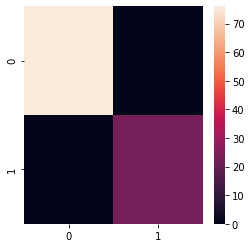

In [ ]:
fig, axn = plt.subplots(1,1, sharex=True, sharey=True,figsize=(4,4))
sns.heatmap(confusion_matrix(y_test, y_pred), cbar=4)

In [ ]:
  tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
  specificity = tn / (tn+fp)
  #especificidadA.append(specificity)
  print("Specificity: ",specificity)
  print("")
  sensivity = tp / (tp+fn)
  #sensibilidadA.append(sensivity)
  print("Sensivity: ",sensivity)
  print("")
  accuracyT = (tp+tn)/ (tn+fp+fn+tp)
  #exactitudA.append(accuracyT)
  print("Accuracy: ",accuracyT)
  print("")
  F1score = 2*tp/ (2*tp+fp+fn)
 # puntajeF1A.append(F1score)
  print("F1 score: ",F1score)
  print("")
  precision = tp/ (tp+fp)
  #PrecisionA.append(precision)
  print("Precision (PPV): ",precision)
  print("")

Specificity:  1.0

Sensivity:  1.0

Accuracy:  1.0

F1 score:  1.0

Precision (PPV):  1.0



/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


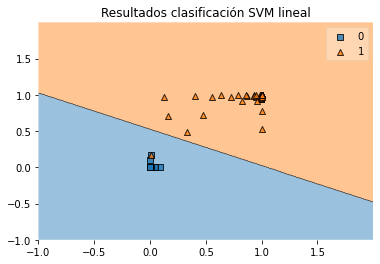

In [ ]:
from mlxtend.plotting import plot_decision_regions
X = X_train.iloc[:, 0:2].values # we only take the first two features.
y = y_train.values
model = svm.SVC(kernel='linear')
clf = model.fit(X, y)

# Representación gráfica utilizando plot_decision_regions() de mlxtend
# ==============================================================================
fig, ax = plt.subplots(figsize=(6,4))
plot_decision_regions(
    X = X,
    y = y.flatten(),
    clf = model,
    ax = ax
)
ax.set_title("Resultados clasificación SVM lineal");

No handles with labels found to put in legend.


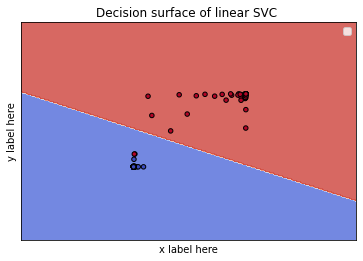

In [ ]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

X = X_train.iloc[:, 0:2].values # we only take the first two features.
y = y_train.values

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = svm.SVC(kernel='linear')
clf = model.fit(X, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0.5, 0, 'DenseNet121')

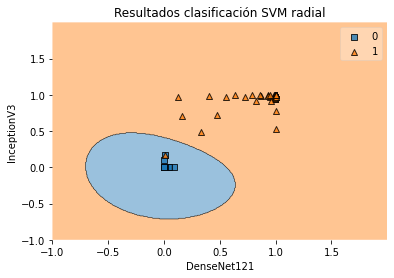

In [ ]:
from mlxtend.plotting import plot_decision_regions
X = X_train.iloc[:, 0:2].values # we only take the first two features.
y = y_train.values
model = svm.SVC(kernel='rbf', gamma='scale')
clf = model.fit(X, y)

# Representación gráfica utilizando plot_decision_regions() de mlxtend
# ==============================================================================
fig, ax = plt.subplots(figsize=(6,4))
plot_decision_regions(
    X = X,
    y = y.flatten(),
    clf = model,
    ax = ax
)
ax.set_title("Resultados clasificación SVM radial")
ax.set_ylabel('InceptionV3')
ax.set_xlabel('DenseNet121')

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0.5, 0, 'ResNet50')

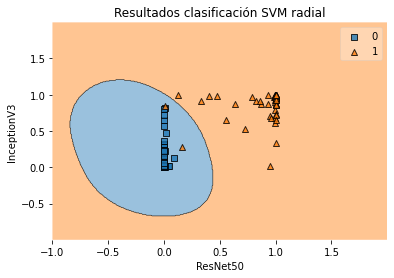

In [ ]:
from mlxtend.plotting import plot_decision_regions
X = X_train.iloc[:, np.r_[0, 2]].values # we only take the first two features.
y = y_train.values
model = svm.SVC(kernel='rbf', gamma='scale')
clf = model.fit(X, y)

# Representación gráfica utilizando plot_decision_regions() de mlxtend
# ==============================================================================
fig, ax = plt.subplots(figsize=(6,4))
plot_decision_regions(
    X = X,
    y = y.flatten(),
    clf = model,
    ax = ax
)
ax.set_title("Resultados clasificación SVM radial")
ax.set_ylabel('InceptionV3')
ax.set_xlabel('ResNet50')

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
X = X_train.values # we take all features.
y = y_train.values
pca = PCA(n_components=2, whiten=True, random_state=42)
x_pca2 = pca.fit_transform(X_train.values) 

In [ ]:
model = svm.SVC(kernel='linear')
#model = svm.SVC(kernel='rbf', gamma='scale')
clf = model.fit(x_pca2, y)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0.5, 0, 'PC1')

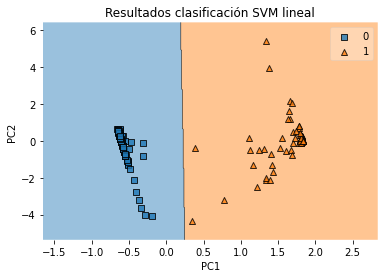

In [ ]:
from mlxtend.plotting import plot_decision_regions
# Representación gráfica utilizando plot_decision_regions() de mlxtend
# ==============================================================================
fig, ax = plt.subplots(figsize=(6,4))
plot_decision_regions(
    X = x_pca2,
    y = y.flatten(),
    clf = model,
    ax = ax
)
ax.set_title("Resultados clasificación SVM lineal")
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0.5, 0, 'PC1')

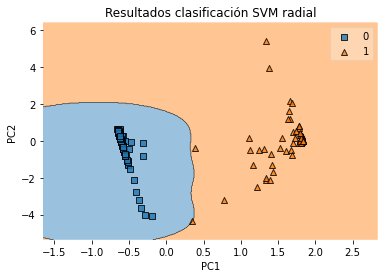

In [ ]:
model = svm.SVC(kernel='rbf', gamma='scale')
clf = model.fit(x_pca2, y)

# Representación gráfica utilizando plot_decision_regions() de mlxtend
# ==============================================================================
fig, ax = plt.subplots(figsize=(6,4))
plot_decision_regions(
    X = x_pca2,
    y = y.flatten(),
    clf = model,
    ax = ax
)
ax.set_title("Resultados clasificación SVM radial")
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')

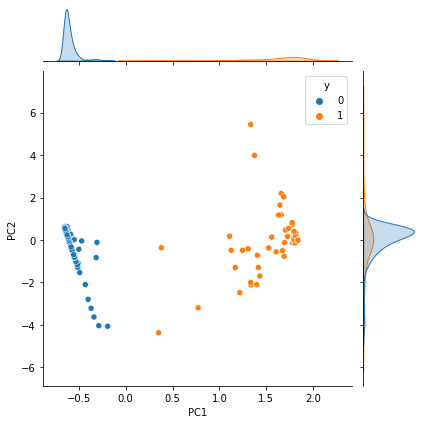

In [ ]:
dpca=pd.DataFrame(x_pca2,columns=['PC1', 'PC2'])
dpca['y']=y
sns.jointplot(data=dpca, x="PC1", y="PC2", hue="y")

b) Logistic regression

In [ ]:
from sklearn.metrics import log_loss, accuracy_score
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

#calculemos la pérdida del modelo
loss = log_loss(y_train, modelo.predict_proba(X_train)[:, 1])
accuracy = accuracy_score(y_test, modelo.predict(X_test))
print('log loss', loss)
print('accuracy', accuracy)  # porcentaje de predicciones correctas.

log loss 0.026808140269414315
accuracy 1.0


In [ ]:
X_train.iloc[:, 0]

602     0.000000e+00
555     0.000000e+00
650     0.000000e+00
897     2.384186e-07
107     9.999997e-01
            ...     
847     1.299381e-05
715     3.951788e-05
905     0.000000e+00
235     9.999929e-01
1061    5.602837e-06
Name: DenseNet121, Length: 762, dtype: float64

(-0.4, 1.0)

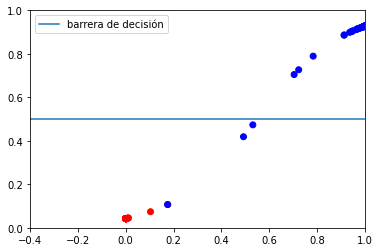

In [ ]:
### Visualicemos las salidas de nuestro modelo univariable
modeloU = LogisticRegression(max_iter=1000)
modeloU.fit(X_train.InceptionV3.values.reshape(-1, 1), y_train.values)

y_hat = modeloU.predict_proba(X_train.InceptionV3.values.reshape(-1, 1))[:, 1]
plt.scatter(X_train.InceptionV3.values.reshape(-1, 1), y_hat, color=['blue' if var == 1 else 'red' for var in y_train.values])
plt.plot([-0.4, 1], [0.5, 0.5], label = 'barrera de decisión')
plt.legend()
plt.ylim([0, 1])
plt.xlim([-0.4, 1])